In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
MAX=float('inf')

In [2]:
def readGraph(path):
    data=np.loadtxt(path,dtype='int', delimiter=' ');
    return data
def maxtrixGraph(data):
    maxPoint=0;
    for item in data:
        maxPoint=max(maxPoint,max(item[0],item[1]));
    print(maxPoint);
    matrix=np.zeros([maxPoint+1,maxPoint+1]); 
    for i in range(maxPoint+1):
        for j in range(maxPoint+1):
            if i==j:
                matrix[i][j]=0;
            else:
                matrix[i][j]=MAX;
    for item in data:
        matrix[item[0]][item[1]]=1;
        matrix[item[1]][item[0]]=1;
    return matrix

In [3]:

def dijkstra(matrix, start_node):
    
    #矩阵一维数组的长度，即节点的个数
    matrix_length = len(matrix)

    #访问过的节点数组
    used_node = [False] * matrix_length

    #最短路径距离数组
    distance = [MAX] * matrix_length

    #初始化，将起始节点的最短路径修改成0
    distance[start_node] = 0
    
    #将访问节点中未访问的个数作为循环值，其实也可以用个点长度代替。
    num=0;
    while used_node.count(False):
        num=num+1;
        if num>matrix_length:
            break;
        min_value = float('inf')
        min_value_index = 9999
        
        #在最短路径节点中找到最小值，已经访问过的不在参与循环。
        #得到最小值下标，每循环一次肯定有一个最小值
        for index in range(matrix_length):
            if not used_node[index] and distance[index] < min_value:
                min_value = distance[index]
                min_value_index = index
        
        #将访问节点数组对应的值修改成True，标志其已经访问过了
        if min_value_index!=9999:
            used_node[min_value_index] = True

        #更新distance数组。
        #以B点为例：distance[x] 起始点达到B点的距离，
        #distance[min_value_index] + matrix[min_value_index][index] 是起始点经过某点达到B点的距离，比较两个值，取较小的那个。
        for index in range(matrix_length):
            if min_value_index!=9999:
                distance[index] = min(distance[index], distance[min_value_index] + matrix[min_value_index][index])

    return distance


In [4]:
#幂迭代法
def power_iteration(A,num:int):
    b_k = np.random.rand(A.shape[1]);
    for i in range(num):
        b_k1=np.dot(A,b_k);
        b_k1_norm=np.linalg.norm(b_k1);
        b_k = b_k1/b_k1_norm;
    return b_k;

In [5]:
def pivotMDS(matrix,k):
    n=len(matrix);
    dis=[];
    for i in range(len(matrix)):
        tmpd=dijkstra(matrix,i);
        dis.append(tmpd);
    for i in range(len(dis)):
        for j in range(len(dis)):
            if dis[i][j]==float('inf'):
                dis[i][j]=0;
    d=np.zeros([n,k]);
    d=np.asarray(dis);
    d=d[0:n,0:k];
    d2=d**2;
    deltaCol =d2.sum(axis=0)/n;
    deltaRow =d2.sum(axis=1)/k;
    sumALL = d2.sum()/(n*k);
    C = np.zeros([n,k]);
    for i in range(n):
        for j in range(k):
            d[i][j]
            C[i][j];
            deltaCol[j]
            deltaRow[i]
            C[i][j]=-(1.0/2)*(d[i][j]**2-deltaCol[j]-deltaRow[i]+sumALL);
    B=np.dot(C.T,C);
    V_1=power_iteration(B,100).reshape(1,-1);
    lbd=np.dot(V_1,np.dot(B,V_1.T));
    B_2=B-lbd/np.linalg.norm(V_1)**2*np.dot(V_1.T,V_1);
    V_2=power_iteration(B_2,100);
    ans=np.zeros([n,2]);
    ans[:,0] = np.dot(C,V_1.reshape(-1,1)).reshape(-1)
    ans[:,1] = np.dot(C,V_2.reshape(-1,1)).reshape(-1)
    return ans;

In [6]:
file_name = 'test1.txt' 
data = readGraph(file_name);
matrix=maxtrixGraph(data);

99


In [7]:
ans = pivotMDS(matrix,50);
print(ans);

[[-4.7267659  -1.71718597]
 [-2.70786678  2.15361921]
 [-3.58193194  2.24092123]
 [-0.22931662  2.26667445]
 [-5.27970435  0.8608379 ]
 [-7.05864308 -1.90366967]
 [ 0.46049295  6.4236491 ]
 [-7.20951142  0.99907122]
 [ 4.70915947  2.50806519]
 [-3.79907398  0.09897976]
 [-4.38750303  0.90497274]
 [-9.34008011 -2.8396763 ]
 [ 4.8485474   1.58299851]
 [ 0.3114467   1.93820786]
 [-4.38750303  0.90497274]
 [-0.46125459  1.68388982]
 [ 5.98388709  1.78590765]
 [ 8.09573031  0.03725109]
 [-6.37345891 -0.28526753]
 [ 5.96851737  2.17450501]
 [17.94163706 -5.34409458]
 [-6.87784122 -1.56609884]
 [-6.19125293 -2.24222299]
 [ 8.86360557  0.71322426]
 [ 7.30925356  1.33048968]
 [ 6.67099874  1.58601166]
 [ 2.64584154  1.39176327]
 [ 8.73594296  0.23306906]
 [ 3.65426712  1.6270069 ]
 [ 1.57803914  2.11795209]
 [ 5.27842185  1.54646172]
 [-4.95889733 -1.15425922]
 [-6.0758092  -2.33889993]
 [-6.82779266 -2.83136589]
 [-6.87751231 -1.56571376]
 [11.47792276 -1.10822248]
 [11.14094833 -0.57818053]
 

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


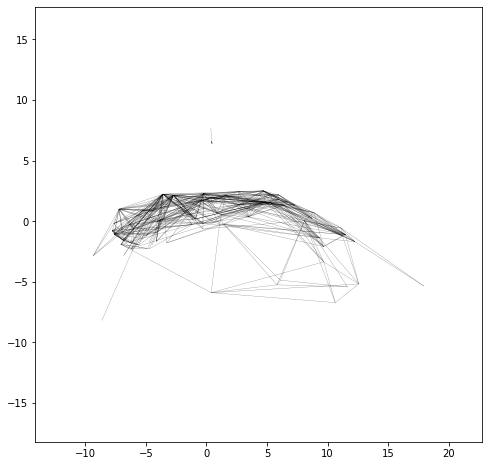

In [8]:
X=ans;
plt.figure(figsize=(8,8))
plt.axis('equal')
ax = plt.axes()
ax.set_xlim(min(ans[:,0])-10, max(ans[:,0])+10)
ax.set_ylim(min(ans[:,1])-10, max(ans[:,1])+10)

lines = []
for item in data:
    lines.append([ans[item[0]],ans[item[1]]]);
lc = mc.LineCollection(lines, linewidths=.3, colors='#0000007f')
ax.add_collection(lc)
plt.show()